# 이미지 분류(다중 분류)
- https://www.tensorflow.org/tutorials/images/classification?hl=ko
- 데이터 셋에서 직접 npz파일 만들어서 작업

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

## 데이터세트 다운로드 및 탐색하기

In [2]:
# 데이터셋 다운로드
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [4]:
# 사이트 외 작업
data_dir # 데이터 셋이 저장된 위치

PosixPath('/root/.keras/datasets/flower_photos')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
# 사이트 외
list(data_dir.glob('*')) # PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt') : 문제가 될 폴더

[PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses')]

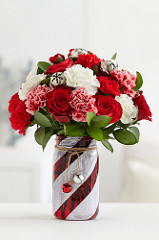

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0])) # roses 폴더의 첫번째 이미지 출력, PIL.Image.open(roses[0])도 가능(str제외)

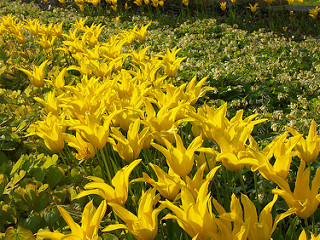

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0])) 

In [12]:
folder = '/root/.keras/datasets/flower_photos/tulips/*'
file_List = list(folder)
len(file_List)

44

In [14]:
folder = 'tulips/*'
file_List = list(data_dir.glob(folder))
len(file_List)

799

## 이미지 데이터 전처리

- 튤립 데이터 전처리

In [20]:
import matplotlib.pyplot as plt

X, y, catNum = [], [], 0

item = 0
folder = list(data_dir.glob('*'))[item]
file_list = list(folder.glob('*'))
len(file_list)

for file in file_list:
    img = PIL.Image.open(str(file_list[0]))
    img = img.resize((180,180))
    img = img.convert('L') # 흑백으로 전환
    imgarr = np.array(img) # 스케일링을 하기 위해서 numpy로 변경
    imgre = imgarr/255 # 0과 1사이 값으로 스케일링
    # plt.imshow(imgre, cmap='gray')
    # plt.show()
    X.append(imgre)
    y.append(catNum) # 튤립을 0 레이블로 저장

In [22]:
np.shape(X) # (799, 180, 180)
np.shape(y) # (799,)

(799,)

- 전체 데이터 전처리

In [77]:
X, y, catNum = [], [], 0

folderList = [0, 1, 2, 4, 5]

for item in folderList:
    folder = list(data_dir.glob('*'))[item]
    file_list = list(folder.glob('*'))

    for file in file_list:
        img = PIL.Image.open(str(file))
        img = img.resize((180,180))
        img = img.convert('L') # 흑백으로 전환
        imgarr = np.array(img) # 스케일링을 하기 위해서 numpy로 변경
        imgre = imgarr/255 # 0과 1사이 값으로 스케일링
        X.append(imgre)
        y.append(catNum) # 튤립을 0 레이블로 저장
    catNum += 1

In [78]:
print(np.shape(X)) 
print(np.shape(y))
print(np.unique(y)) # y가 튤립일 때는 0, 데이지는 1, ..., 4까지 5개의 숫자로 구성

(3670, 180, 180)
(3670,)
[0 1 2 3 4]


In [79]:
# y 레이블명 추출 코드
folderlist = []

for i in range(len(list(data_dir.glob('*')))):
    tmp1 = list(data_dir.glob('*'))
    tmp1 = str(tmp1[i])
    tmp2 = tmp1.split('/')[5]
    if tmp2 != 'LICENSE.txt':
        folderlist.append(tmp2)
folderlist

['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']

## npz 파일 제작

In [80]:
np.savez('flower.npz', x=X, y=y)

In [81]:
!ls

flower.npz  sample_data


In [82]:
### 새파일이라고 가정하고 작업
data = np.load('flower.npz')
list(data)

['x', 'y']

In [83]:
x = data['x']
y = data['y']
class_names = folderlist

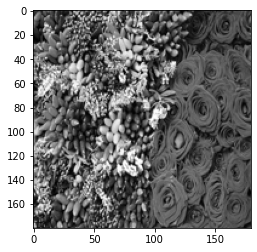

4
roses


In [84]:
plt.imshow(x[3500], cmap='gray')
plt.show()
print(y[3500])
print(class_names[y[3500]])

In [85]:
x[:9].shape

(9, 180, 180)

In [86]:
class_names[y[:9][0]]

'tulips'

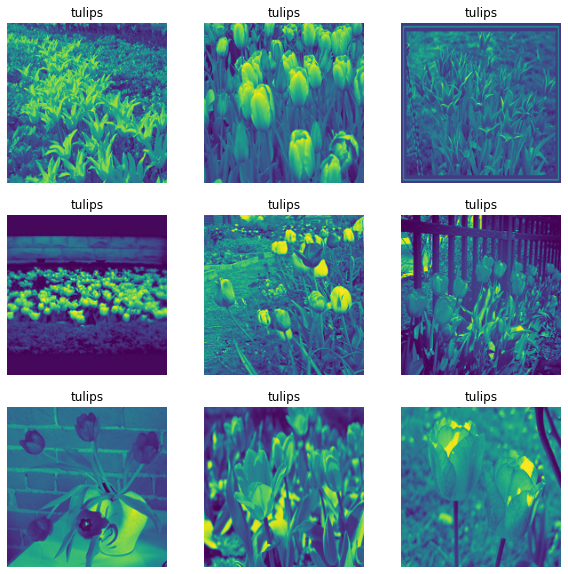

In [87]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[:9][i])
    plt.title(class_names[y[:9][i]])
    plt.axis("off")

## 훈련/테스트 데이터 분리

In [88]:
## 인공신경망에서 모델 제작

## 트레이닝, 테스트 데이터로 분리하기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 모델 만들기

In [ ]:
# 교재 94-96 페이지와 비교했을 때
# 여기서 하지 않은 작업은?
# [1] reshape로 28*28을 784로 변환하지 않음 => layers.Flatten으로 대처
# [2] /255로 나눈 작업 => 미리 작업된 자료라 생략
# [3] y_label을 원핫인코딩하지 않음(페이지 96) => loss='sparse_categorical_crossentropy'로 원핫인코딩을 동시 진행함.

In [89]:
## 모델 구축
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(180, 180)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2), # 불필요한 파라미터를 20%제거(과적합 방지)
#   tf.keras.layers.Dense(5, activation='softmax') 
# ])

- 언더피팅인 경우 성공률을 높이려면(loss를 줄이려면)
    - 파라미터의 개수를 늘린다. (Dense의 유닛수를 늘린다.)
    - 덴스층을 추가한다.
    - 드롭아웃을 제거한다.
    - 배치를 작게한다.
    - 에포크(epochs)를 많이 한다.
    - 러닝레이트값을 더 작게한다.

In [91]:
## 모델 튜닝
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(180, 180)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  # tf.keras.layers.Dropout(0.2), # 불필요한 파라미터를 20%제거(과적합 방지)
  tf.keras.layers.Dense(5, activation='softmax') 
])

## 모델 컴파일

In [92]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy: 원핫인코딩을 동시 진행함.
              metrics=['accuracy'])

## 모델 훈련하기

In [94]:
# 모델 훈련하기
model.fit(x_train, y_train, epochs=50)
model.evaluate(x_test, y_test, verbose=2)
# model.evaluate(x_test, y_test, verbose=0, validation_data=(x_test, y_test))
# 흑백이미지로 하여서 정확도가 낮을 수 밖에 없음

Epoch 1/50
92/92 [==============================] - 9s 99ms/step - loss: 1.8646 - accuracy: 0.2878
Epoch 2/50
92/92 [==============================] - 9s 97ms/step - loss: 1.6110 - accuracy: 0.3239
Epoch 3/50
92/92 [==============================] - 9s 96ms/step - loss: 1.6302 - accuracy: 0.3164
Epoch 4/50
92/92 [==============================] - 9s 98ms/step - loss: 1.5442 - accuracy: 0.3369
Epoch 5/50
92/92 [==============================] - 9s 99ms/step - loss: 1.4970 - accuracy: 0.3457
Epoch 6/50
92/92 [==============================] - 9s 98ms/step - loss: 1.4536 - accuracy: 0.3764
Epoch 7/50
92/92 [==============================] - 9s 99ms/step - loss: 1.4503 - accuracy: 0.3794
Epoch 8/50
92/92 [==============================] - 9s 99ms/step - loss: 1.4460 - accuracy: 0.3794
Epoch 9/50
92/92 [==============================] - 9s 97ms/step - loss: 1.4080 - accuracy: 0.4002
Epoch 10/50
92/92 [==============================] - 9s 97ms/step - loss: 1.4212 - accuracy: 0.4070
Epoch 11/

[2.9326388835906982, 0.31471389532089233]

## 예측

-----실제값-----
2
-----예측값-----
0


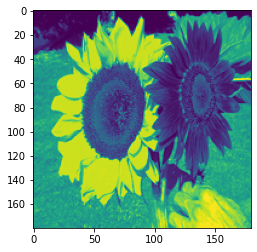

In [96]:
print('-----실제값-----')
plt.imshow(x_test[50])
print(y_test[50])

print('-----예측값-----')
y_pred = model.predict(x_test[49:50])
print(np.argmax(y_pred))

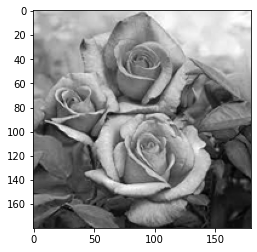

In [111]:
# 새로운 데이터를 예측해보기위해 데이터셋과 동일하게 전처리
img = PIL.Image.open('장미.jpg')
img = img.resize((180,180))
img = img.convert('L') # 흑백으로 전환
imgarr = np.array(img) # 스케일링을 하기 위해서 numpy로 변경
imgre = imgarr/255 # 0과 1사이 값으로 스케일링
plt.imshow(imgre, cmap='gray')
plt.show()

In [113]:
# 새로운 데이터 예측
img_pred = imgre.reshape(1,180,180) # 주의) 텐서에 들어가는 데이터는 기존 데이터에 차원 + 1
y_pred = model.predict(img_pred)
print(np.array(y_pred[0]))
print(np.argmax(np.array(y_pred[0])))
print(class_names[np.argmax(np.array(y_pred[0]))])

[0.00909441 0.02123171 0.0019392  0.9667221  0.00101267]
3
dandelion
